In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt 

2024-09-19 15:42:53.119130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_labels[0]

9

In [6]:
print(train_images.shape,
train_labels.shape)

(60000, 28, 28) (60000,)


we will have a multiclass calssificastion model for (28,28) pixels shaped input and 10 output categories 

In [7]:
x = tf.keras.Input(shape=(10, 10))
y = tf.keras.layers.Flatten()(x)
x.shape

TensorShape([None, 10, 10])

In [8]:
y.shape

TensorShape([None, 100])

sparse categorical crossentropy: erxample label --> [9]


categorical crossentropy: example label --> [0,0,0,0,0,0,0,1,0] (one-hot representation)

loss is sparse categorical crossentropy and note binary crossentropy since it is more suitable to multi class classification. 


In [9]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


2024-09-19 15:43:15.431865: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
history=model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 3.0425 - accuracy: 0.7017
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6610 - accuracy: 0.7688
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5636 - accuracy: 0.8035
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5147 - accuracy: 0.8264
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4979 - accuracy: 0.8317


In [11]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels,verbose=2)
print(test_loss,test_accuracy)

313/313 - 2s - loss: 0.5080 - accuracy: 0.8304 - 2s/epoch - 8ms/step
0.5080121755599976 0.8303999900817871


In [12]:
prediction=model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [13]:
prediction[0]

array([  9.955366, -24.902555, -57.08875 ,  17.808193, -40.40511 ,
        47.708122, -19.834145,  48.73179 ,  32.074543,  51.22192 ],
      dtype=float32)

how can we make use of the output data --> softmax() to convert output to a probability dist.

In [14]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
prediction=probability_model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [15]:
prediction[0]

array([1.0759479e-18, 7.8196961e-34, 0.0000000e+00, 2.7684169e-15,
       0.0000000e+00, 2.6767367e-02, 1.2427209e-31, 7.4503787e-02,
       4.3453876e-09, 8.9872879e-01], dtype=float32)

In [16]:
print(prediction[0].argmax())
print(train_labels[0])

9
9


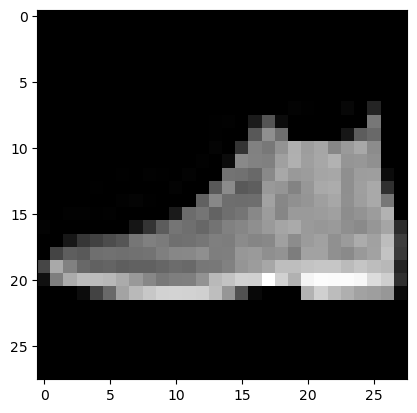

In [17]:
plt.imshow(test_images[0],cmap='grey')

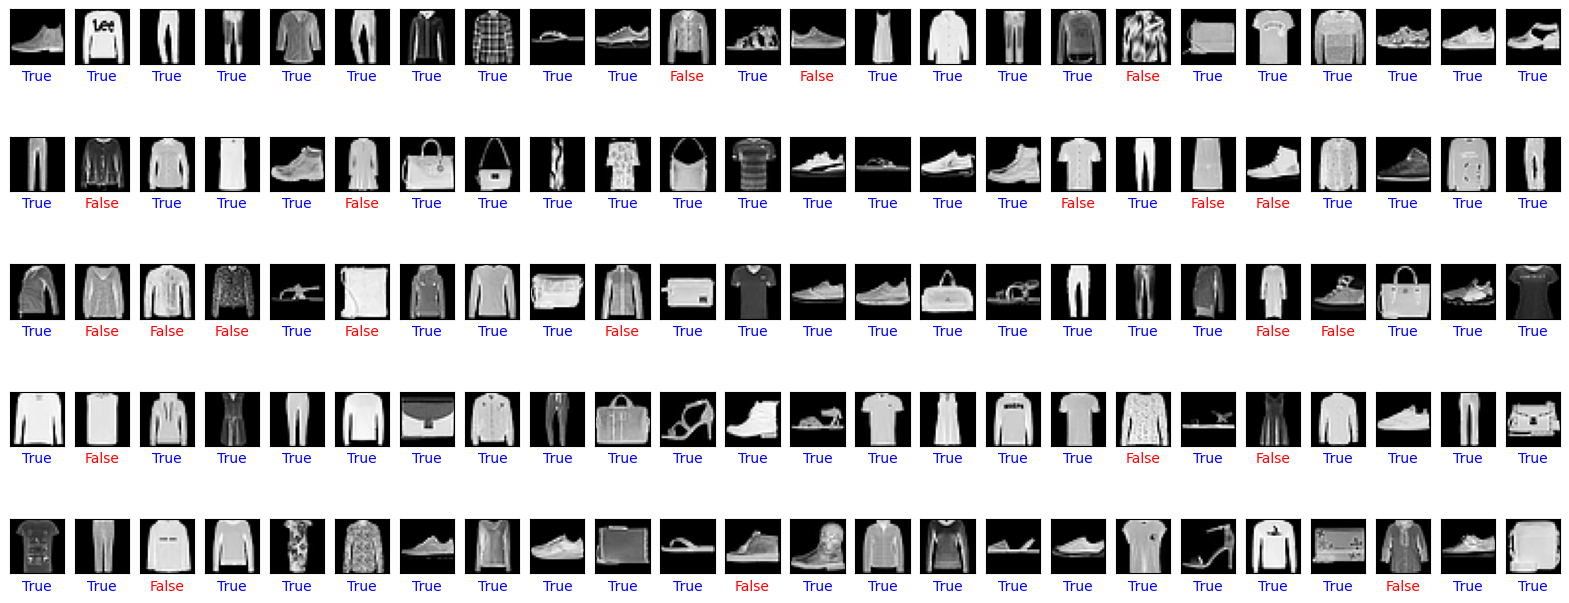

In [37]:

label='False'
color='red'
plt.figure(figsize=(20,8))
for i in range(120):
    label='False'
    color='red'
    if prediction[i].argmax()==test_labels[i]:
        label='True'
        color='blue'
    plt.subplot(5,24,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap='grey')
    plt.xlabel(label,color=color)


In [22]:
test_images.shape

(10000, 28, 28)

TypeError: only integer scalar arrays can be converted to a scalar index

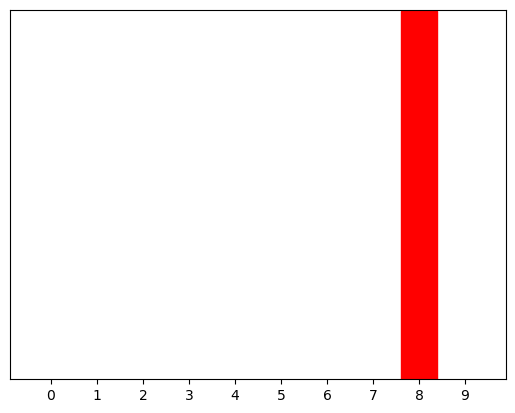

In [19]:
#bu kısmi tutorialdan baktim 
plt.xticks(range(10))
plt.yticks([])
thisplot = plt.bar(range(10), prediction[i], color="#777777")
plt.ylim([0, 1])
predicted_label =prediction[i].argmax()

thisplot[predicted_label].set_color('red')
thisplot[test_labels].set_color('blue')

smaller model

In [50]:
model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10)
])

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model2.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 2.4682 - accuracy: 0.1783
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 2.0339 - accuracy: 0.1954
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.9659 - accuracy: 0.2236
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 1.8718 - accuracy: 0.2542
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.7280 - accuracy: 0.2899


In [51]:
model2.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 1.6382 - accuracy: 0.3216


[1.6382200717926025, 0.3215999901294708]

In [52]:
probability_model2=tf.keras.Sequential([model2,tf.keras.layers.Softmax()])
prediction2=probability_model2.predict(test_images)

313/313 [==============================] - 2s 5ms/step


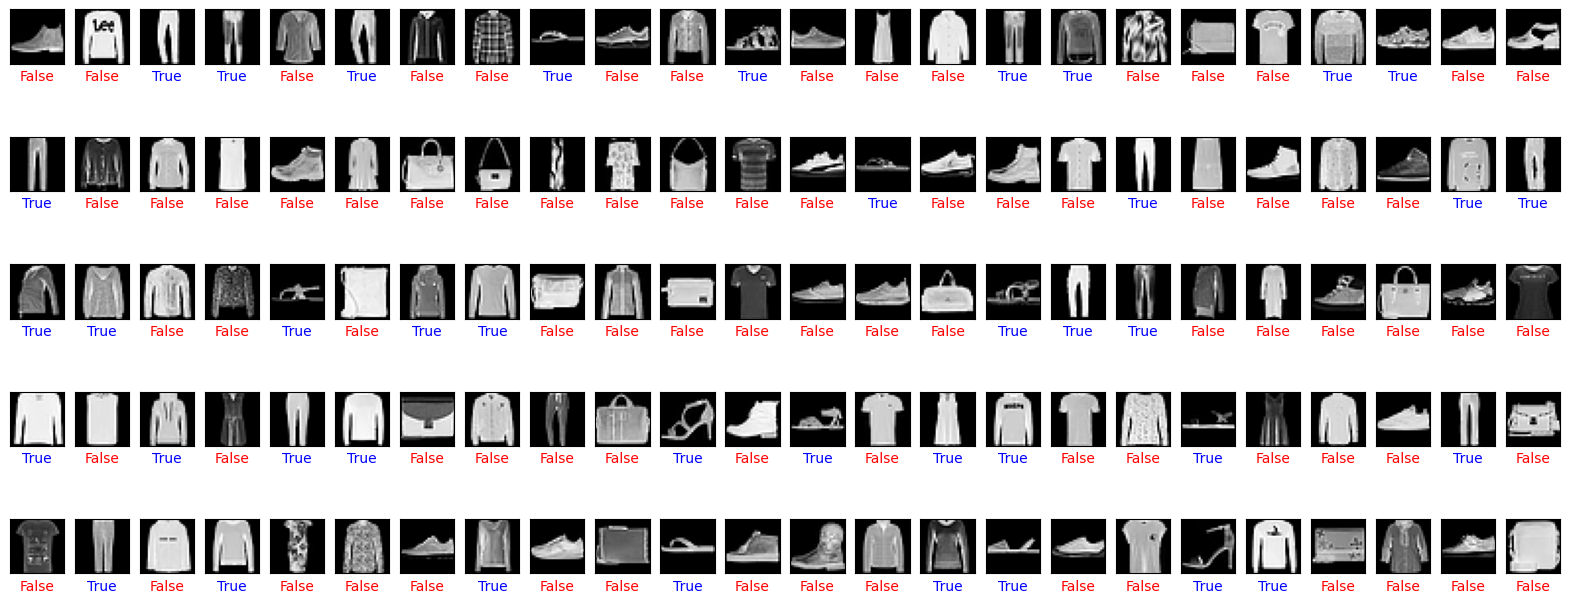

In [53]:

label='False'
color='red'
plt.figure(figsize=(20,8))
for i in range(120):
    label='False'
    color='red'
    if prediction2[i].argmax()==test_labels[i]:
        label='True'
        color='blue'
    plt.subplot(5,24,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap='grey')
    plt.xlabel(label,color=color)

it seems like the model is able to differantiate (some) sandels and pants from anything that are not 

intertmediate model

In [47]:
#last model uses sigmoid activation and features an extra layer 
model3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation='sigmoid'),
    tf.keras.layers.Dense(10,activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model3.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 1.7135 - accuracy: 0.4761
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 1.0931 - accuracy: 0.6244
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.9485 - accuracy: 0.6526
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9210 - accuracy: 0.6593
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8900 - accuracy: 0.6664


In [48]:
model3.evaluate(test_images,test_labels)
probability_model2=tf.keras.Sequential([model3,tf.keras.layers.Softmax()])
prediction3=probability_model2.predict(test_images)

313/313 [==============================] - 1s 4ms/step


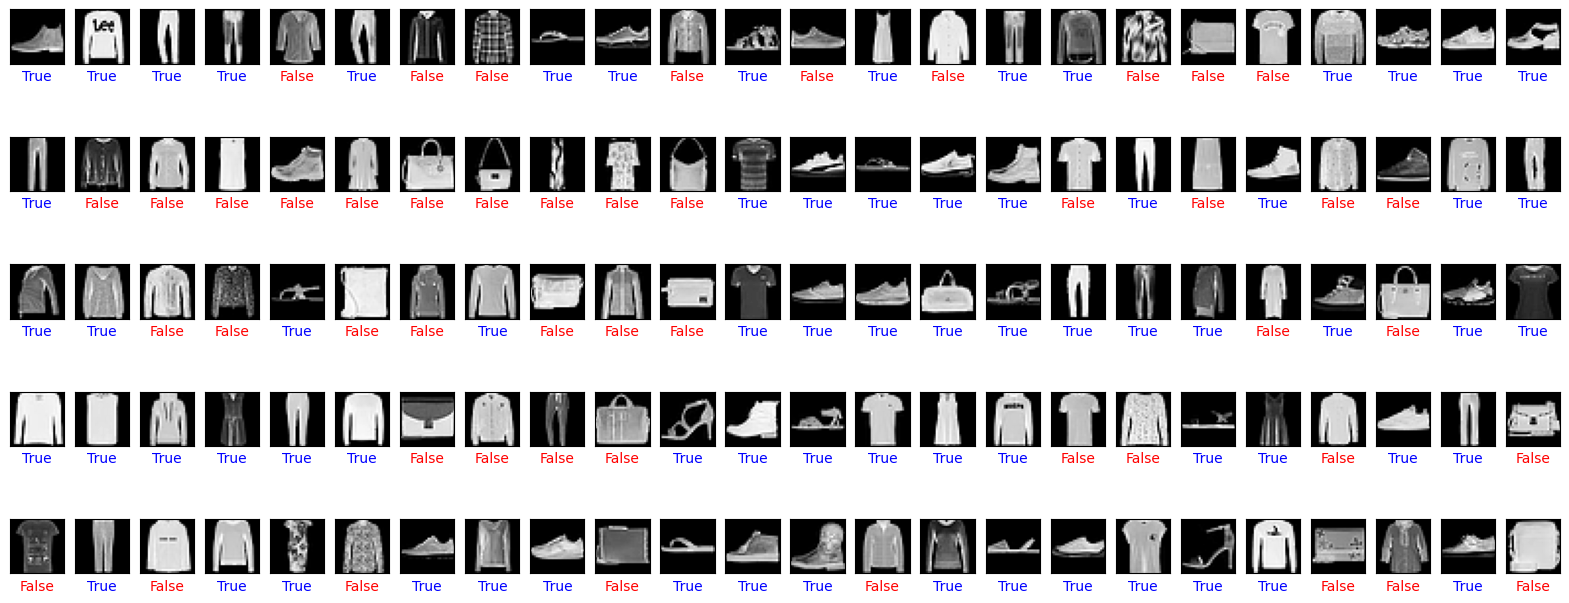

In [49]:
label='False'
color='red'
plt.figure(figsize=(20,8))
for i in range(120):
    label='False'
    color='red'
    if prediction2[i].argmax()==test_labels[i]:
        label='True'
        color='blue'
    plt.subplot(5,24,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap='grey')
    plt.xlabel(label,color=color)